## Working

Loaded image shape: (145, 145), dtype: uint8


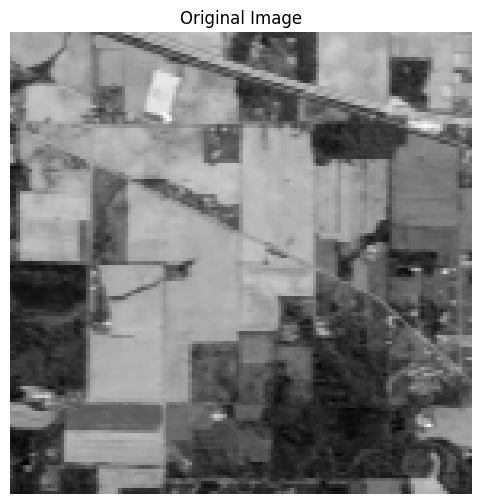

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale)
img = cv2.imread('output_pca.tiff', cv2.IMREAD_GRAYSCALE)

# Safety check
assert img is not None, "Image not loaded. Check the path!"
print(f"Loaded image shape: {img.shape}, dtype: {img.dtype}")

# Normalize if needed (optional, depending on dataset)
if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

# Show image
plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [ ]:
img

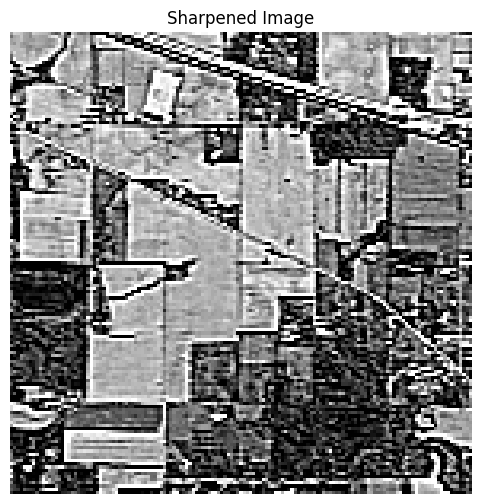

In [2]:
# Create a sharpening kernel
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)
# show the sharpened image
plt.figure(figsize=(6,6))
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

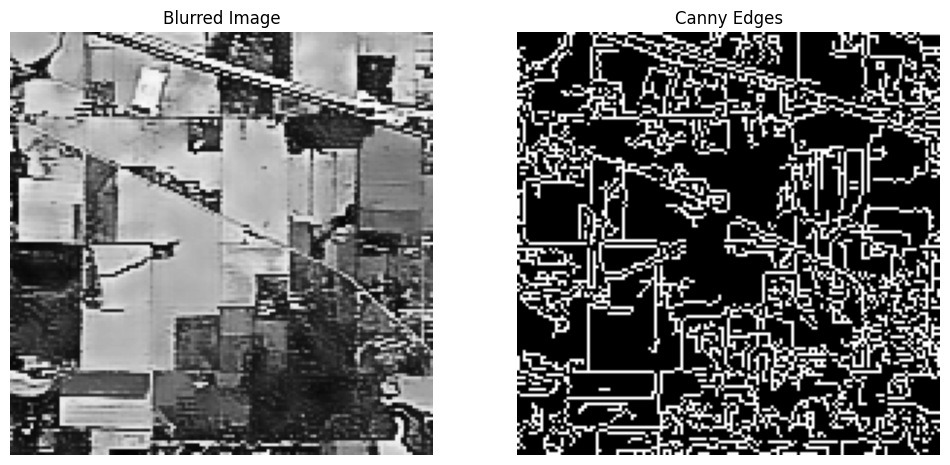

In [3]:
# Apply Gaussian Blur to smooth the image
# blurred = cv2.GaussianBlur(sharpened, (5, 5), 0)

# Apply bilateral filter instead of Gaussian Blur
filtered = cv2.bilateralFilter(sharpened, d=9, sigmaColor=75, sigmaSpace=75)

# #increase contrast of the blurred image
# alpha = 2.5  # Contrast control (1.0-3.0)
# beta = -3  # Brightness control (0-100)
# blurred_contrasted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
# Show blurred image
# plt.figure(figsize=(6,6))
# plt.imshow(filtered, cmap='gray')
# plt.title('Blurred Image')
# plt.axis('off')
# plt.show()

# Apply Canny Edge Detector
# You might need to tweak these thresholds!
low_threshold = 10
high_threshold = 300
edges = cv2.Canny(filtered, low_threshold, high_threshold)


#shlow blurred image and edges side by side for comparison
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(filtered, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()



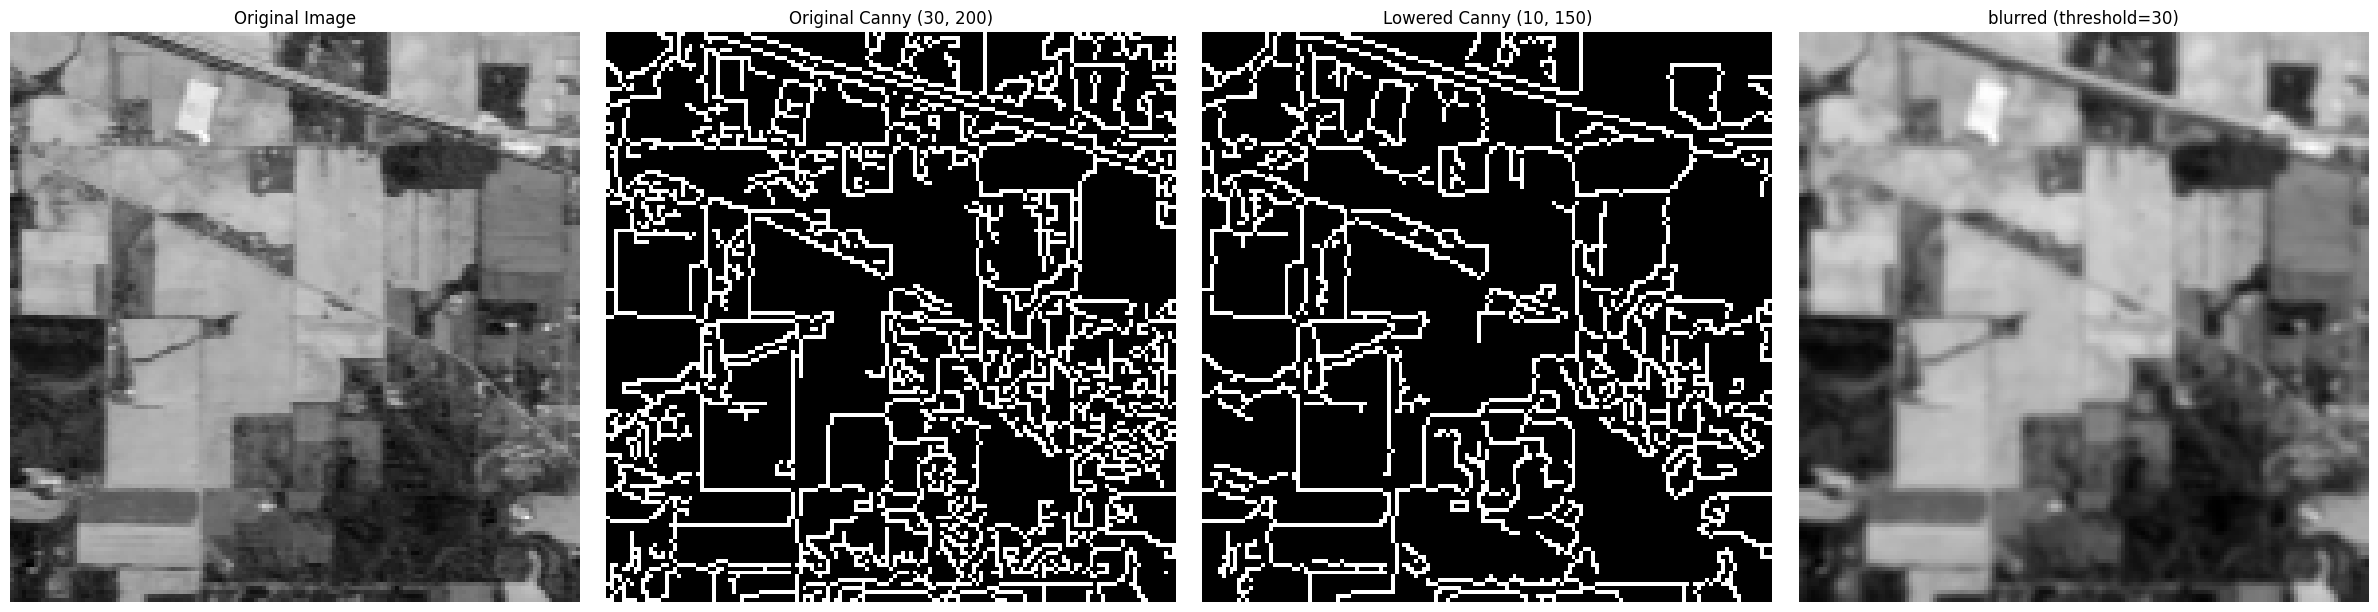

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Let's simulate a sample "processed" image for demonstration
# Normally this would be your image after sharpening + bilateral filtering
# For now we'll simulate it with a slightly blurred and sharpened grayscale image

# Load a sample grayscale image (use OpenCV sample if available)
sample_image = img #cv2.imread(cv2.samples.findFile('sudoku.png'), cv2.IMREAD_GRAYSCALE)
if sample_image is None:
    sample_image = np.random.randint(0, 256, (512, 512), dtype=np.uint8)  # fallback random image

# Simulate sharpening + bilateral filtering
bilateral = cv2.bilateralFilter(sample_image, 9, 75, 75)
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
processed_image = cv2.filter2D(bilateral, -1, sharpen_kernel)

blurred = cv2.GaussianBlur(img, (3, 3), 0)

processed_image = blurred
# 1. Original Canny
edges_original_canny = cv2.Canny(img, 30, 200)

# 2. Lower-threshold Canny
edges_lowered_canny = cv2.Canny(processed_image, 10, 200)

# 3. Sobel Magnitude
grad_x = cv2.Sobel(processed_image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(processed_image, cv2.CV_64F, 0, 1, ksize=3)
grad_magnitude = cv2.magnitude(grad_x, grad_y)
grad_magnitude = cv2.normalize(grad_magnitude, None, 0, 255, cv2.NORM_MINMAX)
_, edges_sobel = cv2.threshold(grad_magnitude, 30, 255, cv2.THRESH_BINARY)
edges_sobel = np.uint8(edges_sobel)

# Plotting side by side
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
axes[0].imshow(sample_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edges_original_canny, cmap='gray')
axes[1].set_title('Original Canny (30, 200)')
axes[1].axis('off')

axes[2].imshow(edges_lowered_canny, cmap='gray')
axes[2].set_title('Lowered Canny (10, 150)')
axes[2].axis('off')

axes[3].imshow(blurred, cmap='gray')
axes[3].set_title('blurred (threshold=30)')
axes[3].axis('off')

plt.tight_layout()
plt.show()



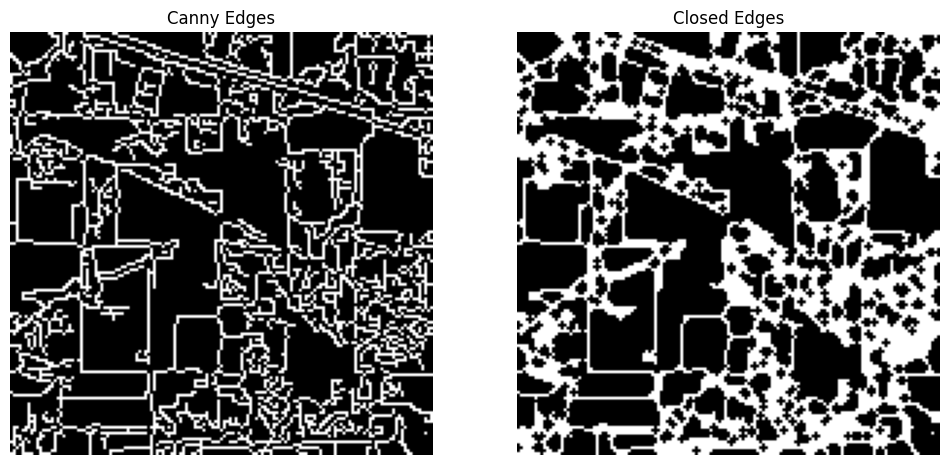

In [16]:
# Create elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# Apply morphological closing
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

#visualize closed edges and edges together for comparison
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')
plt.axis('off')
plt.show()


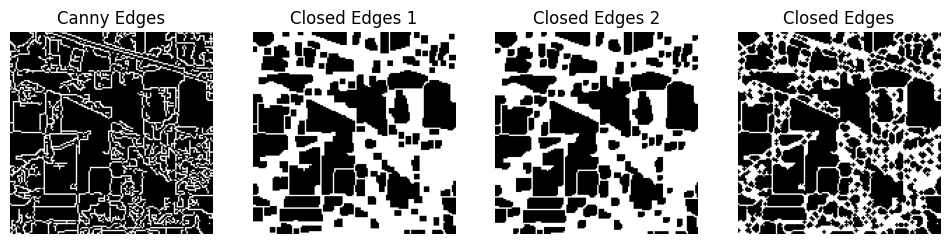

In [17]:
# 1st pass: Stronger square closing
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
closed_edges_1 = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel1)

# 2nd pass: Softer elliptical closing
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
closed_edges_2 = cv2.morphologyEx(closed_edges_1, cv2.MORPH_CLOSE, kernel2)

#visualize closed edges, edges, closed_edges_1 and closed_edges_2 together for comparison
plt.figure(figsize=(12,6))
plt.subplot(1, 4, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(closed_edges_1, cmap='gray')
plt.title('Closed Edges 1')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(closed_edges_2, cmap='gray')
plt.title('Closed Edges 2')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')
plt.axis('off')
plt.show()



Number of clusters detected: 89


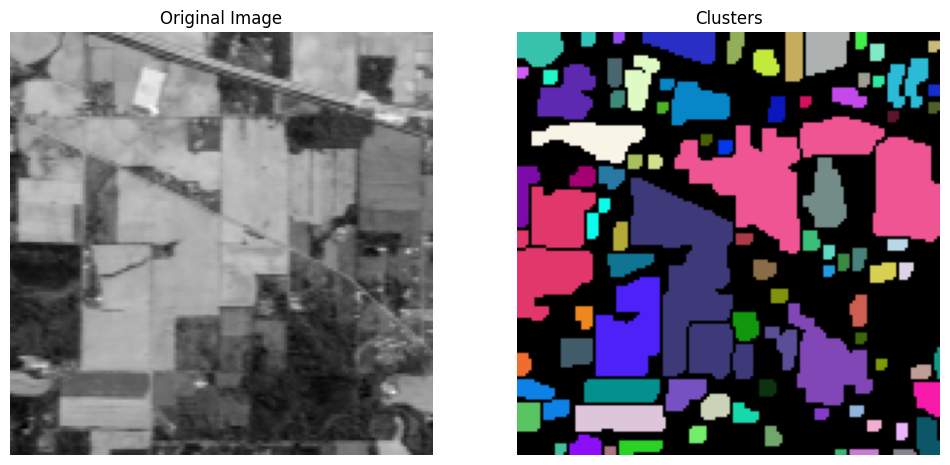

In [18]:
# Assuming 'final_closed_edges' is your latest processed image (after two closings)

# Invert the image: white regions become foreground (1), black background (0)
inverted = cv2.bitwise_not(closed_edges_2)

# Find connected components
num_labels, labels = cv2.connectedComponents(inverted)

print(f"Number of clusters detected: {num_labels - 1}")  # Subtract 1 for background

# Optional: Create a color map to visualize each cluster
import numpy as np

output_img = np.zeros((labels.shape[0], labels.shape[1], 3), dtype=np.uint8)
colors = np.random.randint(0, 255, size=(num_labels, 3))

for label in range(1, num_labels):  # Skip background label 0
    output_img[labels == label] = colors[label]

#Visualize the clusters with the original image(img)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('Clusters')
plt.axis('off')
plt.show()



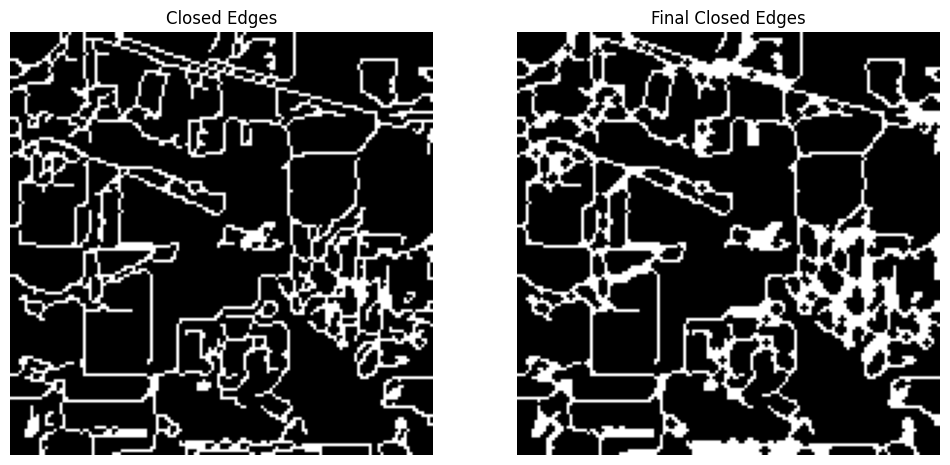

In [10]:
# Assume 'closed_edges' is the result after first (2,2) closing

# Create a slightly larger elliptical kernel
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# Apply a second morphological closing
final_closed_edges = cv2.morphologyEx(closed_edges, cv2.MORPH_CLOSE, kernel2)

# Visualize final_closed_edges and closed_edges together for comparison
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(final_closed_edges, cmap='gray')
plt.title('Final Closed Edges')
plt.axis('off')
plt.show()
# cv2.imshow('Final Closed Edges', final_closed_edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


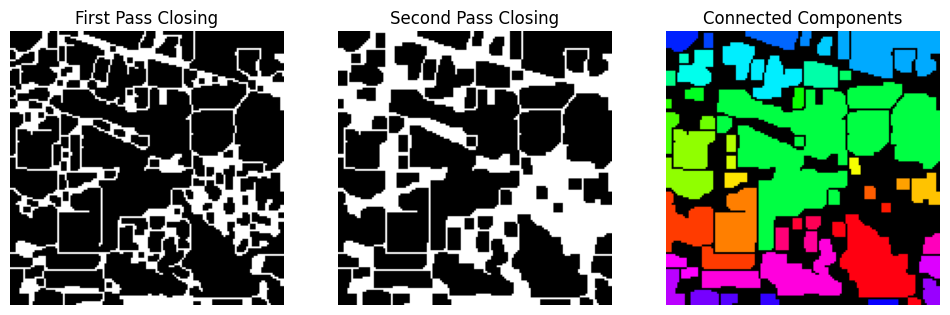

Number of regions detected (excluding background): 44


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'closed_edges' is your current binary image after the first closing pass.

# First pass: Smaller kernel (3x3) for mild closing
kernel1 = np.ones((3, 3), np.uint8)
closed_first_pass = cv2.morphologyEx(closed_edges, cv2.MORPH_CLOSE, kernel1)

# Second pass: Slightly larger kernel (5x5) for stronger closing
kernel2 = np.ones((5, 5), np.uint8)
closed_second_pass = cv2.morphologyEx(closed_first_pass, cv2.MORPH_CLOSE, kernel2)

# Now that the edges are better closed, let's apply Connected Components

# Invert the image: 1's (regions) become white, 0's (background) become black
inverted = cv2.bitwise_not(closed_second_pass)

# Apply connected components
num_labels, labels = cv2.connectedComponents(inverted)

# Map component labels to colors
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
colored_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Convert to BGR for visualization
colored_img = cv2.cvtColor(colored_img, cv2.COLOR_HSV2BGR)

# Set background label to black
colored_img[label_hue == 0] = 0


#visualize first pass, second pass and colored image together
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(closed_first_pass, cmap='gray')
plt.title('First Pass Closing')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(closed_second_pass, cmap='gray')
plt.title('Second Pass Closing')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(colored_img)
plt.title('Connected Components')
plt.axis('off')
plt.show()
# # Visualize the result
# plt.figure(figsize=(10,10))
# plt.imshow(colored_img)
# plt.title('Connected Components Segmentation (after 2-pass closing)')
# plt.axis('off')
# plt.show()

# Output number of detected regions (excluding background)
print(f"Number of regions detected (excluding background): {num_labels-1}")


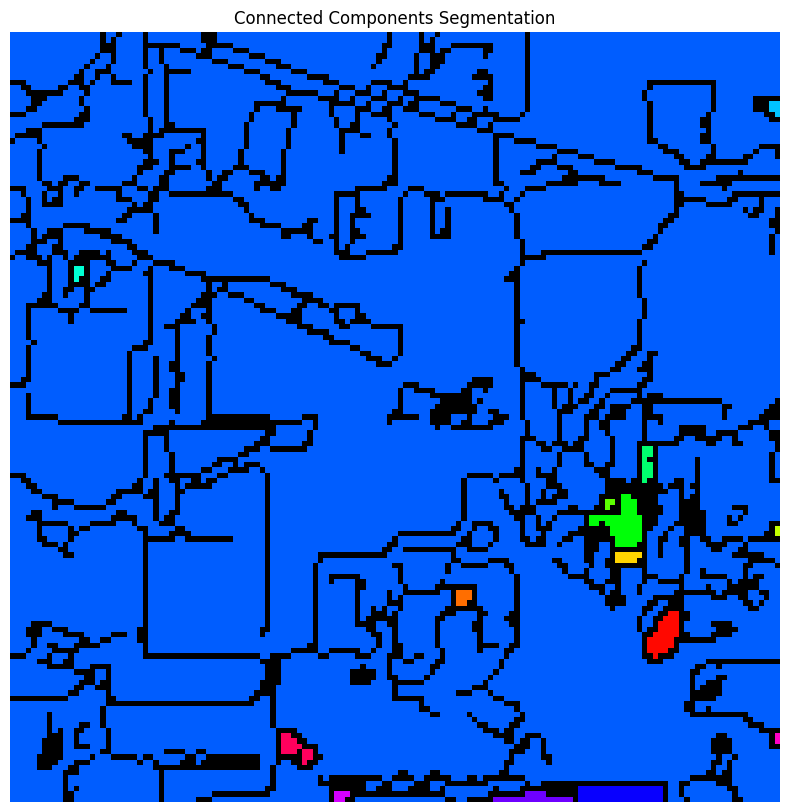

Number of regions detected (excluding background): 15


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'closed_edges' is your current binary image after closing.

# Invert the edges: edges become black (0), regions become white (255)
inverted = cv2.bitwise_not(closed_edges)

# Apply connected components
num_labels, labels = cv2.connectedComponents(inverted)

# Map component labels to colors
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
colored_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Convert to BGR for visualization
colored_img = cv2.cvtColor(colored_img, cv2.COLOR_HSV2BGR)

# Set background label to black
colored_img[label_hue == 0] = 0

# Visualize
plt.figure(figsize=(10,10))
plt.imshow(colored_img)
plt.title('Connected Components Segmentation')
plt.axis('off')
plt.show()

print(f"Number of regions detected (excluding background): {num_labels-1}")


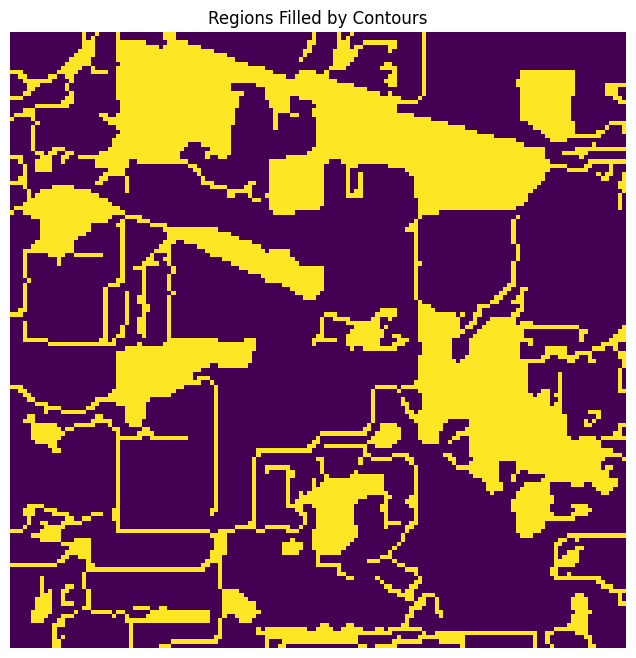

In [ ]:
# Find contours from closed edges
contours, hierarchy = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty mask
mask = np.zeros_like(closed_edges)

# Fill each contour
cv2.drawContours(mask, contours, -1, color=255, thickness=-1)

# Visualize
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap='gray')
plt.title('Regions Filled by Contours')
plt.axis('off')
plt.show()


## Work 2

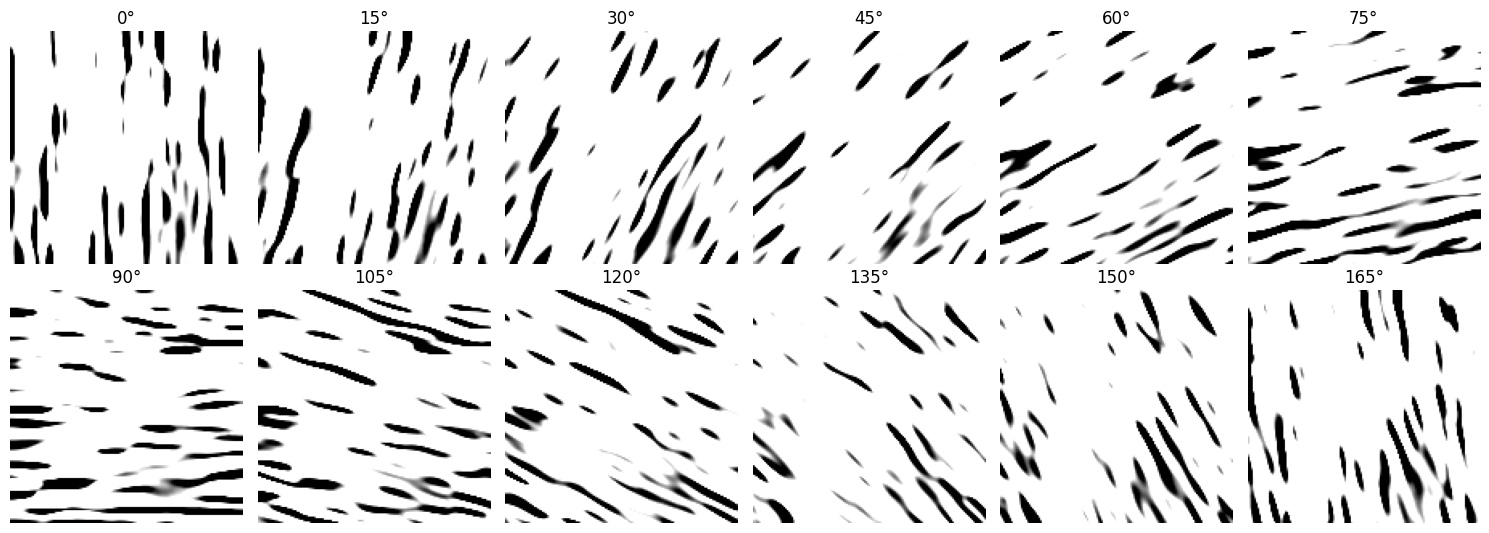

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create Gabor kernel
def build_gabor_kernels(ksize=31, sigma=4.0, lambd=10.0, gamma=0.5, psi=0):
    kernels = []
    angles = np.arange(0, 180, 15)  # Every 15 degrees
    for theta in angles:
        theta_rad = np.deg2rad(theta)
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta_rad, lambd, gamma, psi, ktype=cv2.CV_32F)
        kernels.append((theta, kernel))
    return kernels

# Function to apply Gabor filters
def apply_gabor_filters(img, kernels):
    filtered_images = []
    for theta, kernel in kernels:
        filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
        filtered_images.append((theta, filtered))
    return filtered_images

# Load your image (grayscale)
img = cv2.imread('output_pca.tiff', cv2.IMREAD_GRAYSCALE)

# Build Gabor filters
kernels = build_gabor_kernels()

# Apply Gabor filters
filtered_images = apply_gabor_filters(img, kernels)

# Plot the results
plt.figure(figsize=(15, 8))
for i, (theta, fimg) in enumerate(filtered_images):
    plt.subplot(3, 6, i+1)
    plt.imshow(fimg, cmap='gray')
    plt.title(f"{theta}°")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Test

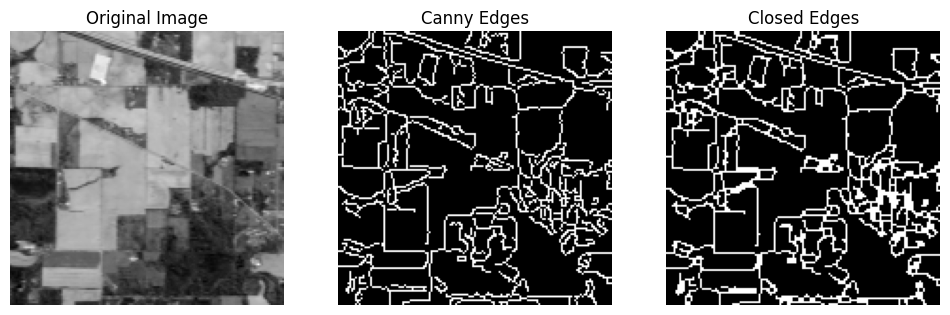

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'edges' is your current edge map from Canny

# Define a small kernel
kernel = np.ones((2,2), np.uint8)

# Apply Morphological Closing
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# show img, closed_edges and edges side by side for comparison
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')
plt.axis('off')
plt.show()




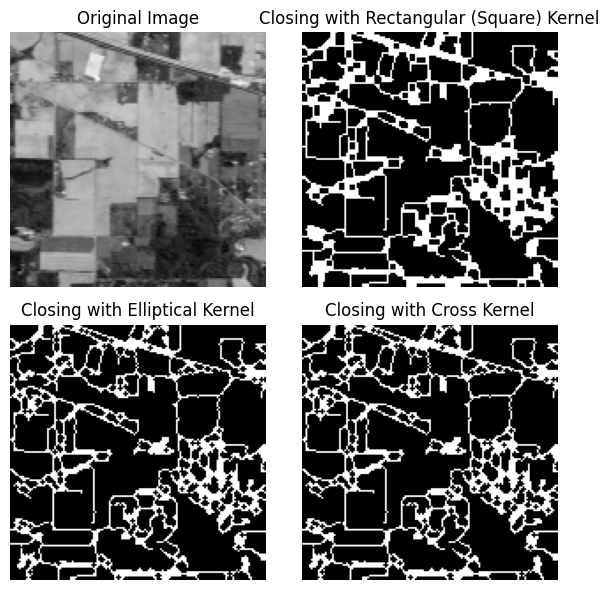

In [17]:
# Different structuring elements
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))  # This is the normal square

# Apply morphological closing with each
closed_edges_ellipse = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel_ellipse)
closed_edges_cross = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel_cross)
closed_edges_rect = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel_rect)

# Visualize
fig, axs = plt.subplots(2, 2, figsize=(6,6))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].imshow(closed_edges_rect, cmap='gray')
axs[0, 1].set_title('Closing with Rectangular (Square) Kernel')
axs[0, 1].axis('off')
axs[1, 0].imshow(closed_edges_ellipse, cmap='gray')
axs[1, 0].set_title('Closing with Elliptical Kernel')
axs[1, 0].axis('off')
axs[1, 1].imshow(closed_edges_cross, cmap='gray')
axs[1, 1].set_title('Closing with Cross Kernel')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

# axs[0].imshow(closed_edges_ellipse, cmap='gray')
# axs[0].set_title('Closing with Elliptical Kernel')
# axs[0].axis('off')

# axs[1].imshow(closed_edges_cross, cmap='gray')
# axs[1].set_title('Closing with Cross Kernel')
# axs[1].axis('off')

# axs[2].imshow(closed_edges_rect, cmap='gray')
# axs[2].set_title('Closing with Rectangular (Square) Kernel')
# axs[2].axis('off')

# plt.show()


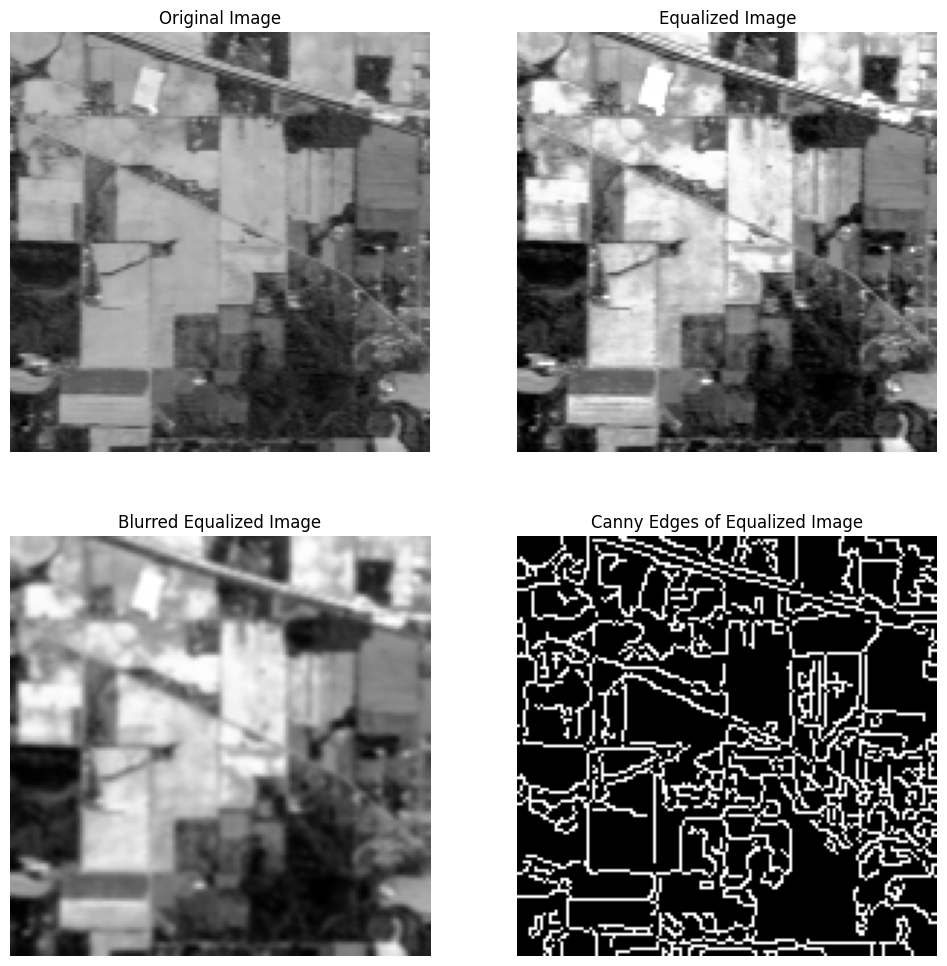

In [18]:
# Histogram Equalization
img_eq = cv2.equalizeHist(img)

# Apply Gaussian Blur again
blurred_eq = cv2.GaussianBlur(img_eq, (3,3), 0)

# Canny Edge Detection again
edges_eq = cv2.Canny(blurred_eq, low_threshold, high_threshold)

# Show the four Images - img, img_eq, blurred_eq and edges_eq togerther for comparison
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(blurred_eq, cmap='gray')
plt.title('Blurred Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(edges_eq, cmap='gray')
plt.title('Canny Edges of Equalized Image')
plt.axis('off')
plt.show()



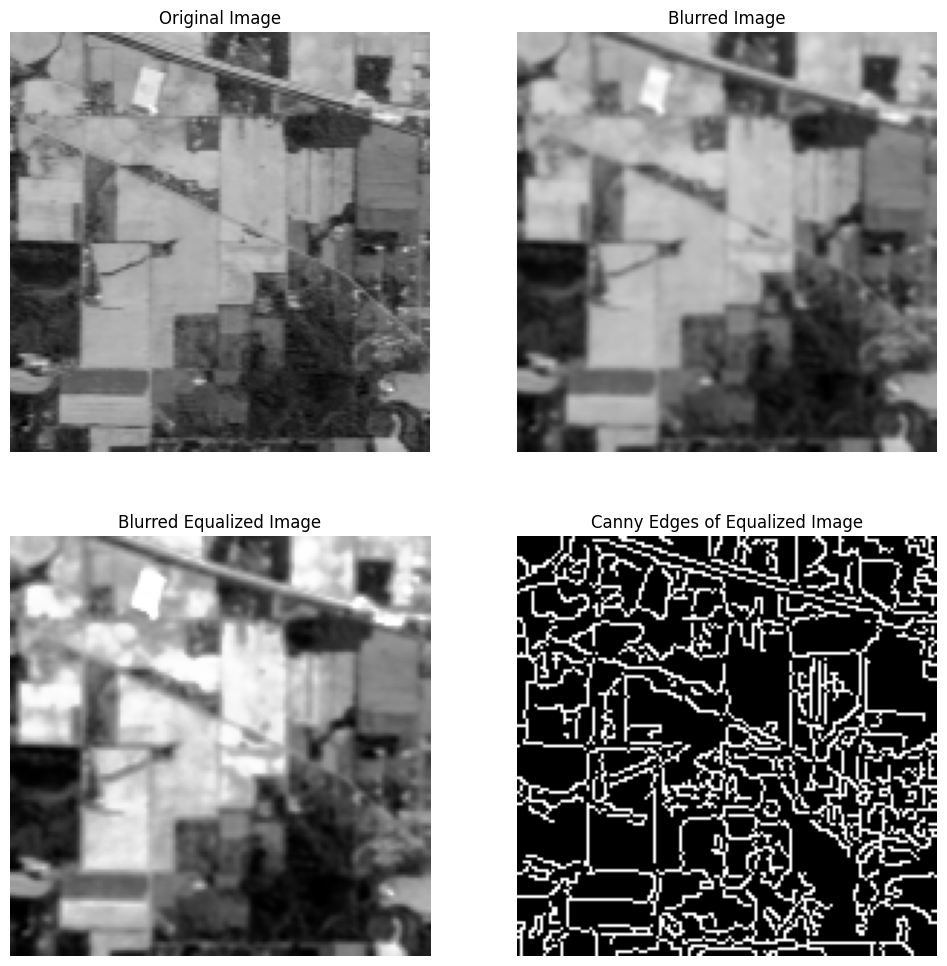

In [19]:
# Apply Gaussian Blur again
blurred = cv2.GaussianBlur(img, (3,3), 0)

# Histogram Equalization
blurred_eq = cv2.equalizeHist(blurred)

# Canny Edge Detection again
edges_eq = cv2.Canny(blurred_eq, low_threshold, high_threshold)

# Show the four Images - img, img_eq, blurred_eq and edges_eq togerther for comparison
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(blurred_eq, cmap='gray')
plt.title('Blurred Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(edges_eq, cmap='gray')
plt.title('Canny Edges of Equalized Image')
plt.axis('off')
plt.show()



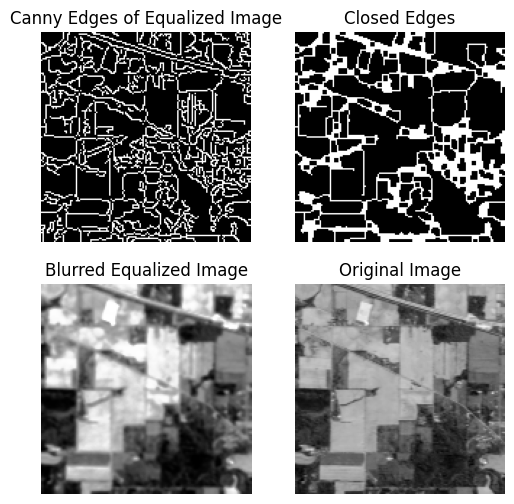

In [20]:
# Morphological closing to close gaps in edges
kernel = np.ones((3,3), np.uint8)  # small square kernel
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Show edges_eq, closed_edges blurred_eq and img together comparison
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(edges_eq, cmap='gray')
plt.title('Canny Edges of Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(blurred_eq, cmap='gray')
plt.title('Blurred Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()



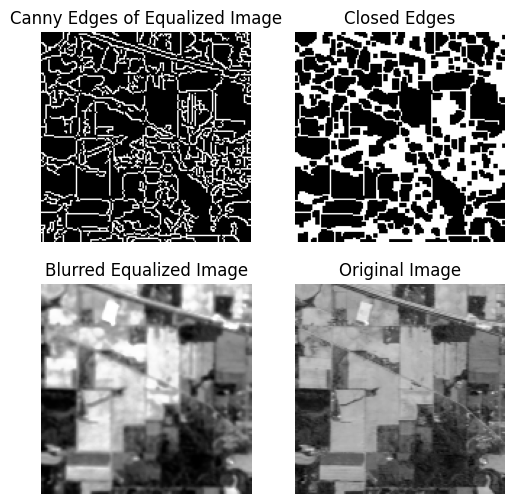

In [21]:
# Morphological closing to close gaps in edges
kernel = np.ones((3,3), np.uint8)  # small square kernel
closed_edges = cv2.morphologyEx(edges_eq, cv2.MORPH_CLOSE, kernel)

# Show edges_eq, closed_edges blurred_eq and img together comparison
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(edges_eq, cmap='gray')
plt.title('Canny Edges of Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(closed_edges, cmap='gray')
plt.title('Closed Edges')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(blurred_eq, cmap='gray')
plt.title('Blurred Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

